### Cleora Graph Embedding Algorithm

 Developers: Barbara Rychalska, Piotr Babel, Konrad Gołuchowski, Andrzej Michałowski and Jacek Dabrowski

    Synerise
    Warsaw University of Technology
    
#### Citation: https://arxiv.org/abs/2102.02302

Synerise Cleora is MIT licensed, as found in the LICENSE file.

Cleora  is  an  algorithm  which  processes  data  from  large retailers in a production environment, with graphs comprised of millions of nodes and billions of edges. Embedding times for  our  biggest  e-commerce  datasets  are  below  2  hours  on  a single  Azure  virtual  machine  of  type  Standard  E32s v3  32vCPUs/16 cores and 256 GB RAM. Cleora has already been in use for 1 year. Synerise released  Cleora  as  open-source  software.  They  offer  an easy to run, highly optimized implementation written in Rust. They released the code in Github under the permissive MIT license, which allows commercial use.

### Graph Structures

Graphs  are  data  structures  which  are  extremely  useful  formodeling  real-life  interaction  structures.  A  graph  is  represented by sets of nodes and edges, where each node represents an entity from the graph domain, and each edge represents the relationship between two or more nodes.
    
A graph G can be defined as an ordered set G(V, E) where V(G) represents the set of vertices and E(G) represents the set of edges which are used to connect these vertices.

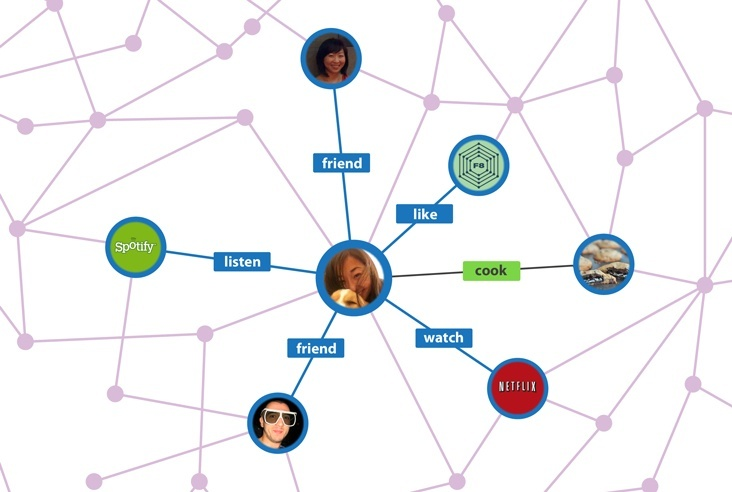

### Types of Graph

A graph can be directed or undirected. However, in an undirected graph, edges are not associated with the directions with them. An undirected graph is shown in the above figure since its edges are not attached with any of the directions. If an edge exists between vertex A and B then the vertices can be traversed from B to A as well as A to B.

In a directed graph, edges form an ordered pair. Edges represent a specific path from some vertex A to another vertex B. Node A is called initial node while node B is called terminal node.

A Graph G(V, E) with 5 vertices (A, B, C, D, E) and six edges ((A,B), (B,C), (C,E), (E,D), (D,B), (D,A)) is shown in the following figure.


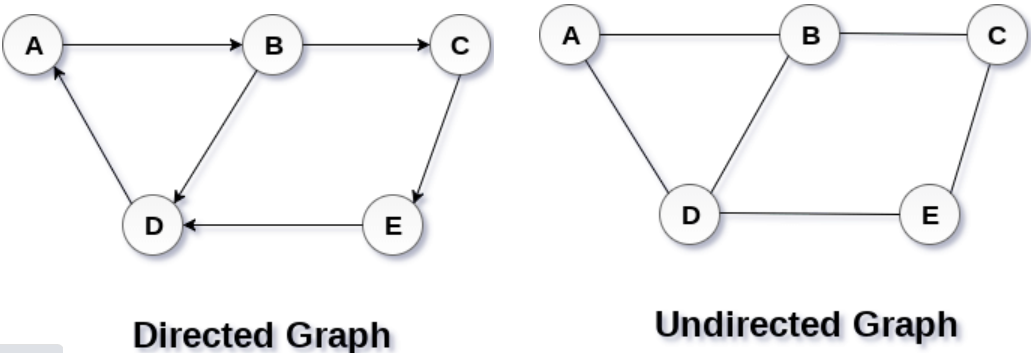

### What is Graph Embedding?

Graph Embedding is a technique in machine learning consisting in representing complex objects like graphs into a vector with a reduced number of features (~100) compared to the dimension of the dataset (several billions nodes in a graph for instance), while preserving the most important information about them.

Graph embeddings are the transformation of property graphs to a vector or a set of vectors. Embedding should capture the graph topology, vertex-to-vertex relationship, and other relevant information about graphs, subgraphs, and vertices.

#### A few commonly used approaches from the first group (DeepWalk, node2vec, SDNE)
#### In machine learning, vector operations are simpler and faster than comparable operations on graphs.

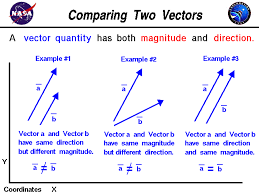

### Key advantages of Cleora

    almost 200x faster than DeepWalk
    ~4x-8x faster than PyTorch-BigGraph (depends on use case)
    star expansion, clique expansion, and no expansion support for hypergraphs
    quality of results outperforming or competitive with other embedding frameworks like PyTorch-BigGraph, GOSH, DeepWalk, LINE
    can embed extremely large graphs & hypergraphs on a single machine

### Cleora Algorithm

#### Cleora performs:

    1.Star decomposition of hyper-edges

    2.Creation of pairwise edges for all hyperdeges

    3.Embedding of each graph

The final output of Cleora consists of multiple files for each (undirected) pair of entity types in the table.

Those embeddings can then be utilized in a novel way thanks to their dim-wise independence property.

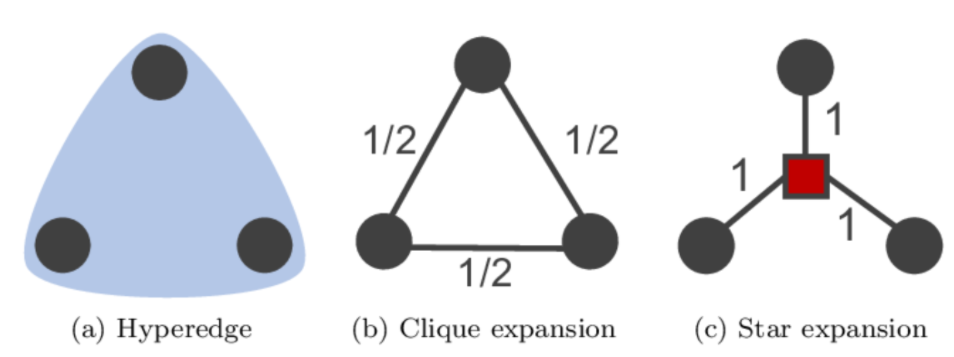

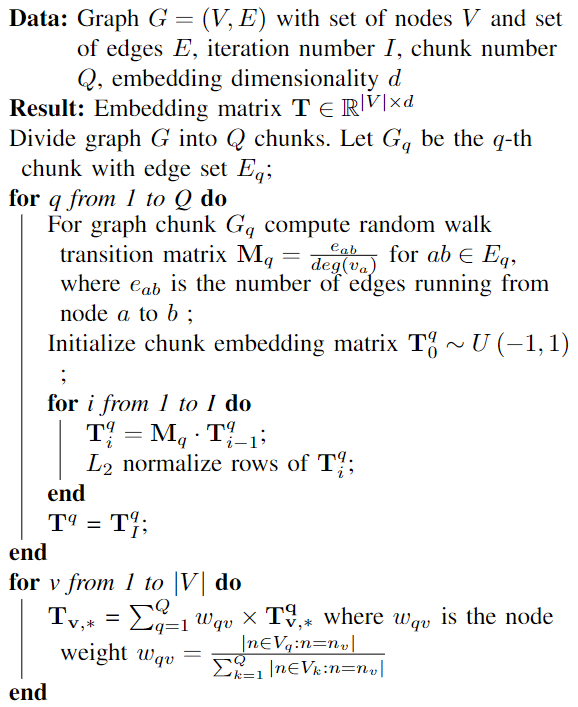

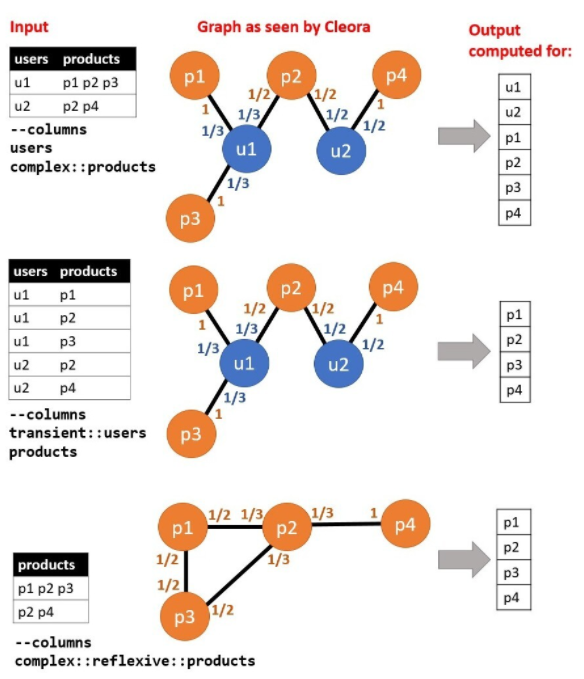

### Running Options

    cleora [options 2] <params 1> [options 2] <params 2> …

cleora-v1.1.1-x86_64-pc-windows-msvc -i files/samples/edgelist_1.tsv 
--columns="complex::reflexive::a b complex::c" 
-d 128 
-n 5 
--relation-name=test_relation_name 
-p 0  
--output-dir "C:/Data_Science/Global Marketing Analytics/Cleora_EMDE/output"

cleora-v1.1.1-x86_64-pc-windows-msvc -i files/samples/edgelist_2.tsv --columns="complex::reflexive::u p complex::b" -d 128 -n 5 --relation-name=test_relation_name -p 0  --output-dir "C:/Data_Science/Global Marketing Analytics/Cleora_EMDE/output"

### Efficient Manifold Density Estimator

This post will be about a cool new feature engineering technique for encoding sets of vectors as a single vector - as described in the recent paper An efficient manifold density estimator for all recommendation systems. 

http://nadbordrozd.github.io/blog/2020/09/07/embedding-sets-of-vectors-with-emde/

#### Citation: https://arxiv.org/pdf/2006.01894.pdf

#### EMDE is an algorithm for compressing sets of vectors into a single fixed-width vector. It often arises when you have one kind of entities (users) interacting with another (items, merchants, websites).

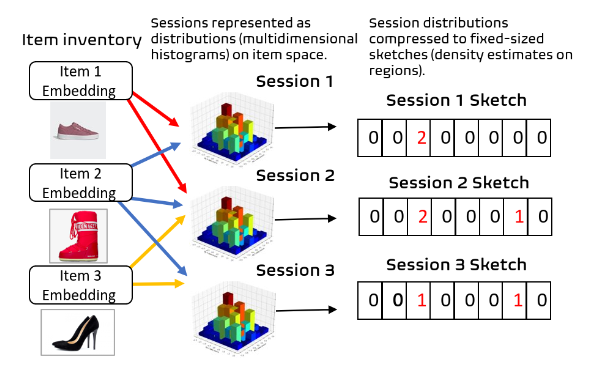

Encoding densities in a multidimensional space. Each item is represented by an embedding vector of arbitrary modality (interactions, textual description, image).
Embedding spaces of items are represented with multidimensional histograms. Items from each session are encoded into fixed-size sketch structures.

#### EMDE Configuration:
On top of EMDE, we use a simple one-hidden-layer feed-forward neural network with 12,000 neurons. We put 80% of randomly shuffled user
items into the input sketch, and the remaining 20% into the output sketch to reflect train/test split ratio of items for
a single user.

### The Algorithm

#### INPUT 
The input to this algorithm consists of:

    the set of embeddings of all items
    list of items per user

#### Hyperparameters:

    K - the number of hyperplanes in a single partitioning
    and N - the number of independent partitionings

#### OUTPUT
The output is a sparse embedding of each user.
The algorithm (the illustrations will use K=3 and N=4)

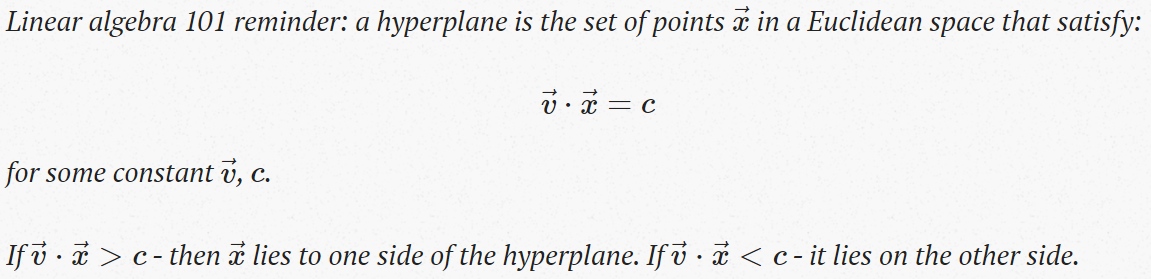

#### EXAMPLE
    Let’s say you already have a vector representation (embedding) of every food item in the world. Like any good embedding, it captures the metric relations between the underlying objects - similar foods are represented by similar vectors and vice versa. You also have a list of people and the foods they like. You would like to leverage the food embeddings to create embeddings of the people - for the purpose of recommendation or classification or any other person-based ML task.


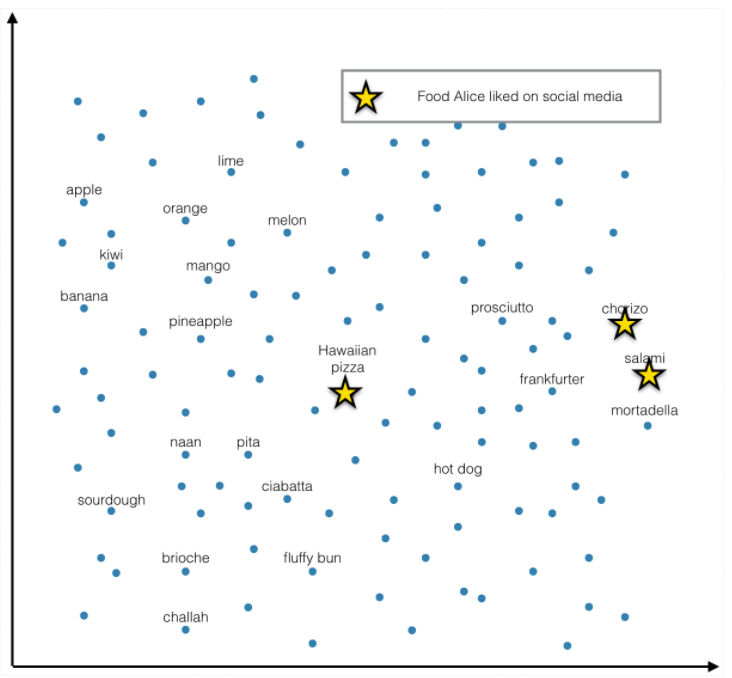

#### 1. Start with the set of embeddings of all items.

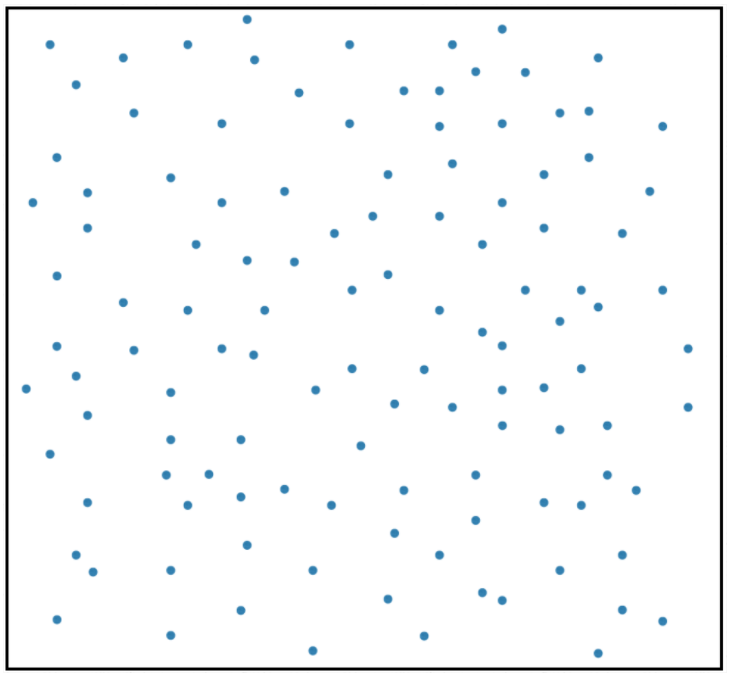

#### 2. Cut the space into regions (buckets) using random hyperplanes. The orientation of the hyperplanes is uniformly random and their position is drawn from the distribution of the item vectors. That means the planes always cut through the data and most often through regions where data is dense, never outside the range of data.

Assign numbers to the regions.

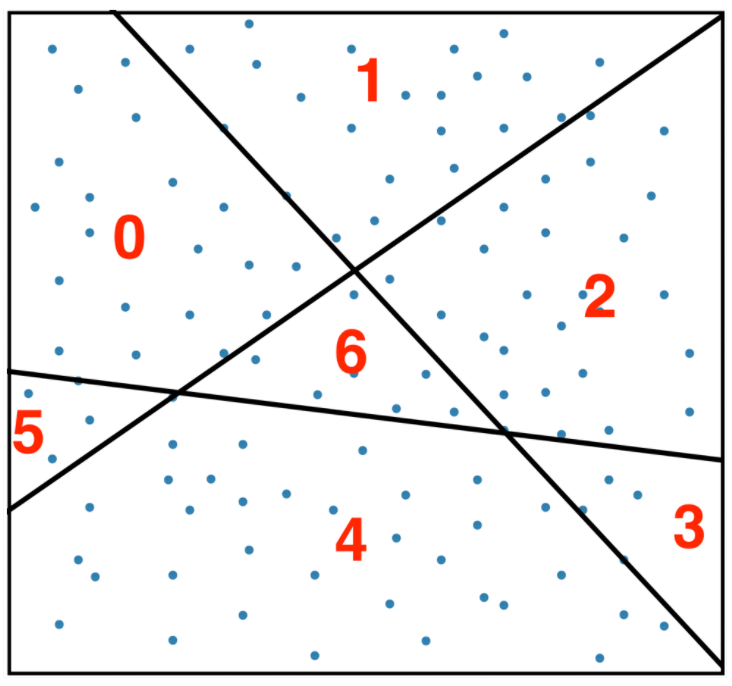

#### 3. For each user count items in each bucket.

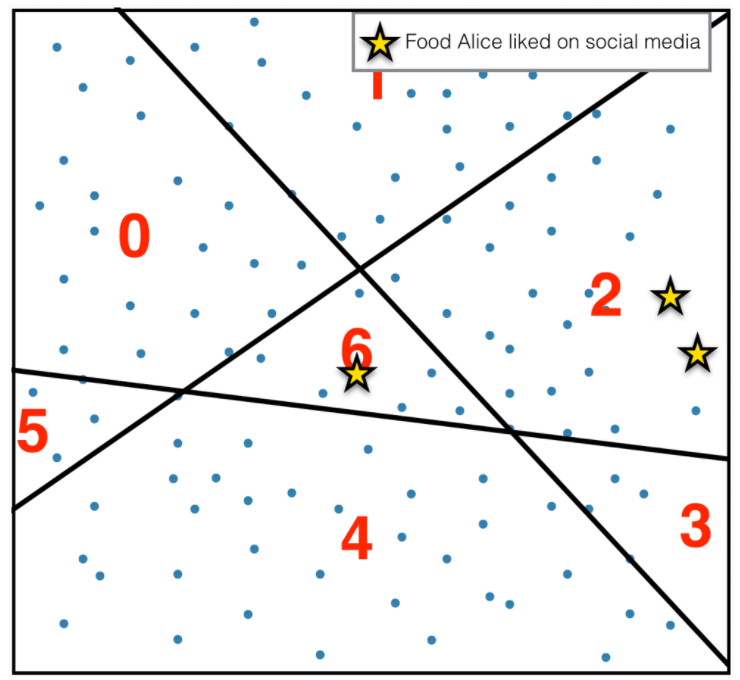

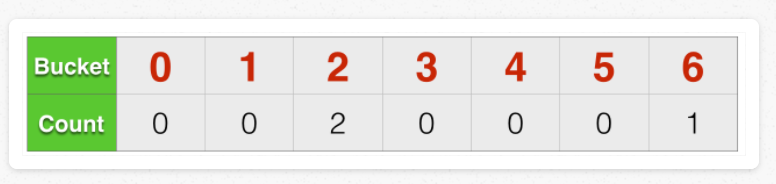

The sequence of numbers generated this way:
    [0, 0, 2, 0, 0, 0, 1]
is the desired summary of the user’s items (almost). It is easy to see that these numbers define a coarse-grained density function over the space of items - like so:

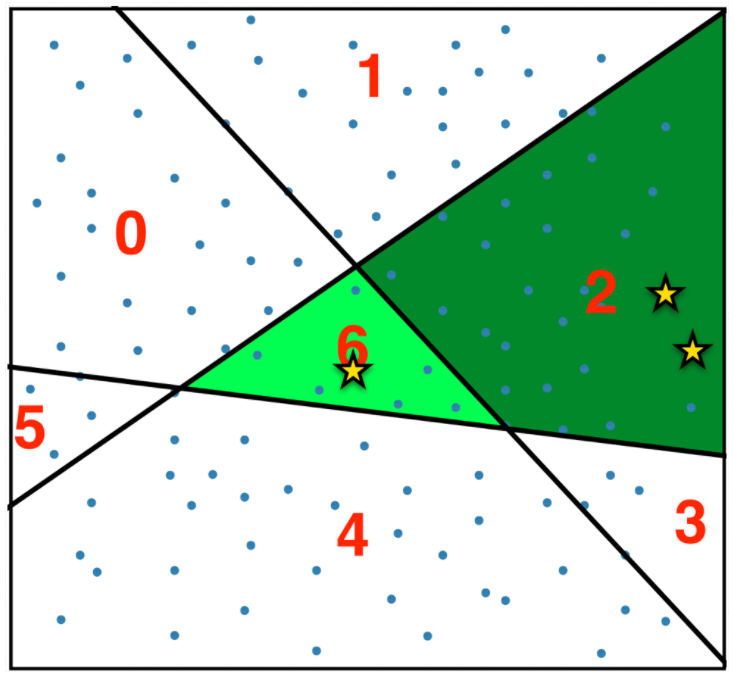

#### 4. To get a more fine-grained estimate of the latent density, we need to repeat steps 2. and 3. N times and concatenate the resulting count vectors per user.

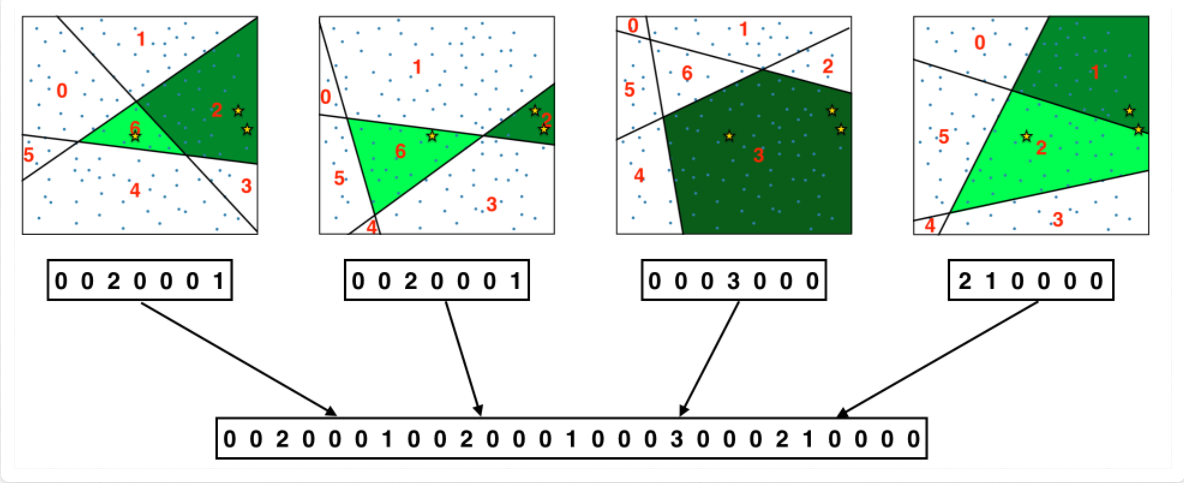

This sequence of numbers (the authors of the paper call it a “sketch” as it is a kind of a Count Sketch) is the final output of EMDE (for one particular user).
  
#### [0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0]

1. The resulting sketches are additive - sketch({apple, salami}) = sketch({apple}) + sketch({salami}).
2. Similar items tend to fall into the same bucket so they end up with a similar sketch - sketch({apple, salami}) ~ sketch({pear, chorizo}).

### EMDE Python Implementation

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as ssp
from sklearn.preprocessing import normalize

def EMDE_transform(K, N, item_vectors):
    """takes a and array of embedding vectors and 
    returns a sparse array of their sketches
    """
    n_items, d = item_vectors.shape
    shallow_sketches = []
    for _ in range(N):
        # first chose K vectors at random - these are the normal vectors to the K hyperplanes
        random_vectors = np.random.normal(size=(K, d))

        # for every hyperplane choose one of the items at random
        # we will choose the offset for the hyperplane so that it passes
        # through the selected item (or rather the item's vector)
        random_inds = np.random.randint(n_items, size=K)

        # scalar product of every item with the random vectors
        scalar_products = random_vectors.dot(item_vectors.T)
        offsets = scalar_products[range(K), random_inds]

        # for every point for every plane determine 
        # on which side of the plane does the point lie
        # the result is a boolean array of size (n_items, K)
        bits = (scalar_products > offsets.reshape([K, 1])).T

        # for every item encode the sequence of booleans as an integer using binary
        # the result is an integer array of length n_items
        bucket_nums = (bits * (2**np.arange(K))).sum(axis=1)

        # one-hot-encoding on bucket numbers
        sketch = CountVectorizer(analyzer=lambda x: x).fit_transform(
            bucket_nums.reshape(n_items, 1))
        shallow_sketches.append(sketch)

    return ssp.hstack(shallow_sketches)

In [2]:
class EMDEVectorizer(object):
    """A drop-in replacement for CountVectorizer and TfidfVectorizer
    - based on EMDE"""
    def __init__(self, K, N, item2vec, tfidf=False):
        items = list(item2vec.keys())
        item_vectors = np.vstack(list(item2vec.values()))

        self.emde_embeddings = EMDE_transform(K, N, item_vectors)
        if tfidf:
            self.vectorizer = TfidfVectorizer(analyzer=lambda x: x, vocabulary=items)
        else:
            self.vectorizer = CountVectorizer(analyzer=lambda x: x, vocabulary=items)

    def fit(self, X, y=None):
        # this is only necessary for tfidf=True, otherwise it does nothing
        self.vectorizer.fit(X)
        return self

    def transform(self, X):
        return self.vectorizer.transform(X).dot(self.emde_embeddings)

In [3]:
item2vec = {
    'chorizo': np.array([0.2, -0.4, 0.15]),
    'banana': np.array([0.7, -1.2, 2.56]),
    'sourdough': np.array([0.9, 0.1, 0.04])
}

user_baskets = [
    ['chorizo', 'banana'],
    ['sourdough'],
    ['banana', 'banana', 'banana'],
    ['banana', 'chorizo', 'sourdough', 'sourdough']
]

emde = EMDEVectorizer(K=3, N=2, item2vec=item2vec)
users_embedded = emde.transform(user_baskets)
users_embedded.todense()

matrix([[0, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 1],
        [0, 3, 0, 3, 0, 0],
        [2, 1, 1, 1, 1, 2]], dtype=int64)

In [4]:
# Normalized results

users_embedded_normed = normalize(users_embedded)
users_embedded_normed.todense()

matrix([[0.        , 0.5       , 0.5       , 0.5       , 0.5       ,
         0.        ],
        [0.70710678, 0.        , 0.        , 0.        , 0.        ,
         0.70710678],
        [0.        , 0.70710678, 0.        , 0.70710678, 0.        ,
         0.        ],
        [0.57735027, 0.28867513, 0.28867513, 0.28867513, 0.28867513,
         0.57735027]])

### EMDE Recommender Architecture

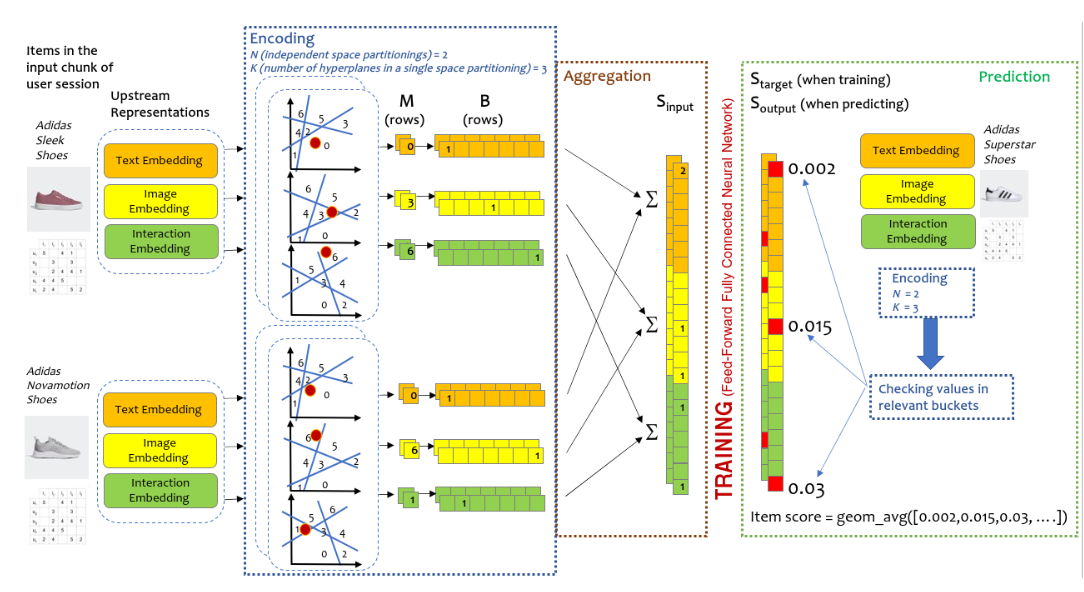

### A typical application of EMDE consists of 4 steps:
    
    1) computing multiple independent partitionings of the data manifold
    2) filling the resulting structure with weighted observations
    3) using a simple neural network to model input density into output density transformation 
    4) querying the output structure to obtain density estimates
    